<a href="https://colab.research.google.com/github/pujangrg1/pujan_INFO5731_Spring2020/blob/main/In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fifth In-class-exercise (2/23/2021, 20 points in total)

In exercise-03, I asked you to collected 500 textual data based on your own information needs (If you didn't collect the textual data, you should recollect for this exercise). Now we need to think about how to represent the textual data for text classification. In this exercise, you are required to select 10 types of features (10 types of features but absolutely more than 10 features) in the followings feature list, then represent the 500 texts with these features. The output should be in the following format:
![image.png](attachment:image.png)

The feature list:

* (1) tf-idf features
* (2) POS-tag features: number of adjective, adverb, auxiliary, punctuation, complementizer, coordinating conjunction, subordinating conjunction, determiner, interjection, noun, possessor, preposition, pronoun, quantifier, verb, and other. (select some of them if you use pos-tag features)
* (3) Linguistic features:
  * number of right-branching nodes across all constituent types
  * number of right-branching nodes for NPs only
  * number of left-branching nodes across all constituent types
  * number of left-branching nodes for NPs only
  * number of premodifiers across all constituent types
  * number of premodifiers within NPs only
  * number of postmodifiers across all constituent types
  * number of postmodifiers within NPs only
  * branching index across all constituent types, i.e. the number of right-branching nodes minus number of left-branching nodes
  * branching index for NPs only
  * branching weight index: number of tokens covered by right-branching nodes minus number of tokens covered by left-branching nodes across all categories
  * branching weight index for NPs only 
  * modification index, i.e. the number of premodifiers minus the number of postmodifiers across all categories
  * modification index for NPs only
  * modification weight index: length in tokens of all premodifiers minus length in tokens of all postmodifiers across all categories
  * modification weight index for NPs only
  * coordination balance, i.e. the maximal length difference in coordinated constituents
  
  * density (density can be calculated using the ratio of folowing function words to content words) of determiners/quantifiers
  * density of pronouns
  * density of prepositions
  * density of punctuation marks, specifically commas and semicolons
  * density of auxiliary verbs
  * density of conjunctions
  * density of different pronoun types: Wh, 1st, 2nd, and 3rd person pronouns
  
  * maximal and average NP length
  * maximal and average AJP length
  * maximal and average PP length
  * maximal and average AVP length
  * sentence length

* Other features in your mind (ie., pre-defined patterns)

In [73]:
import requests, re
from bs4 import BeautifulSoup
import pandas as pd

url_to_parse = "https://www.listchallenges.com/lonely-planet-ultimate-travel-top-500-sights"
response = requests.get(url_to_parse)
response_text = response.text
soup= BeautifulSoup(response_text, 'lxml')
data = soup.find_all(class_='item-name')
destinations = []
for x in range(13):
  for i in data:
    dest = i.text
    regex = re.compile(r'[\n\r\t]')
    dest = regex.sub(" ", dest)
    dest = dest.strip()
    destinations.append(dest)

destinationlist = pd.DataFrame(destinations,columns=['Location'])
print("\tTop 500 Global Destinations")        
print(destinationlist)

	Top 500 Global Destinations
                           Location
0              Angkor Wat, Cambodia
1                Great Barrier Reef
2                      Machu Picchu
3               Great Wall of China
4                         Taj Mahal
..                              ...
515                   Lake District
516                   Louvre Museum
517  Torres Del Paine National Park
518                     Lake Baikal
519                    Eiffel Tower

[520 rows x 1 columns]


# **Text Data Preprocessing**

In [74]:
# Please write your code here
destinationlist['LowerCase'] = destinationlist['Location'].apply(lambda x: " ".join(x.lower() for x in x.split()))
destinationlist

,Location,LowerCase
0,"Angkor Wat, Cambodia","angkor wat, cambodia"
1,Great Barrier Reef,great barrier reef
2,Machu Picchu,machu picchu
3,Great Wall of China,great wall of china
4,Taj Mahal,taj mahal
...,...,...
515,Lake District,lake district
516,Louvre Museum,louvre museum
517,Torres Del Paine National Park,torres del paine national park
518,Lake Baikal,lake baikal


In [75]:
import string
destinationlist['Removed Punctuation'] = destinationlist['LowerCase'].apply(lambda x: "".join(x.lower() for x in x if x not in string.punctuation))
destinationlist

,Location,LowerCase,Removed Punctuation
0,"Angkor Wat, Cambodia","angkor wat, cambodia",angkor wat cambodia
1,Great Barrier Reef,great barrier reef,great barrier reef
2,Machu Picchu,machu picchu,machu picchu
3,Great Wall of China,great wall of china,great wall of china
4,Taj Mahal,taj mahal,taj mahal
...,...,...,...
515,Lake District,lake district,lake district
516,Louvre Museum,louvre museum,louvre museum
517,Torres Del Paine National Park,torres del paine national park,torres del paine national park
518,Lake Baikal,lake baikal,lake baikal


In [76]:
import string
destinationlist['Removed Noise'] = destinationlist['Removed Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x.isalnum()))
destinationlist

,Location,LowerCase,Removed Punctuation,Removed Noise
0,"Angkor Wat, Cambodia","angkor wat, cambodia",angkor wat cambodia,angkor wat cambodia
1,Great Barrier Reef,great barrier reef,great barrier reef,great barrier reef
2,Machu Picchu,machu picchu,machu picchu,machu picchu
3,Great Wall of China,great wall of china,great wall of china,great wall of china
4,Taj Mahal,taj mahal,taj mahal,taj mahal
...,...,...,...,...
515,Lake District,lake district,lake district,lake district
516,Louvre Museum,louvre museum,louvre museum,louvre museum
517,Torres Del Paine National Park,torres del paine national park,torres del paine national park,torres del paine national park
518,Lake Baikal,lake baikal,lake baikal,lake baikal


In [8]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> Download
Command 'Download' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/bro

True

In [77]:
destinationlist['Removed Numbers'] = destinationlist['Removed Noise'].apply(lambda x: " ".join(x.lower() for x in x.split() if x.isalpha()))
destinationlist

,Location,LowerCase,Removed Punctuation,Removed Noise,Removed Numbers
0,"Angkor Wat, Cambodia","angkor wat, cambodia",angkor wat cambodia,angkor wat cambodia,angkor wat cambodia
1,Great Barrier Reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef
2,Machu Picchu,machu picchu,machu picchu,machu picchu,machu picchu
3,Great Wall of China,great wall of china,great wall of china,great wall of china,great wall of china
4,Taj Mahal,taj mahal,taj mahal,taj mahal,taj mahal
...,...,...,...,...,...
515,Lake District,lake district,lake district,lake district,lake district
516,Louvre Museum,louvre museum,louvre museum,louvre museum,louvre museum
517,Torres Del Paine National Park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park
518,Lake Baikal,lake baikal,lake baikal,lake baikal,lake baikal


In [78]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
destinationlist['Removed StopWords'] = destinationlist['Removed Numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
destinationlist

,Location,LowerCase,Removed Punctuation,Removed Noise,Removed Numbers,Removed StopWords
0,"Angkor Wat, Cambodia","angkor wat, cambodia",angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia
1,Great Barrier Reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef
2,Machu Picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu
3,Great Wall of China,great wall of china,great wall of china,great wall of china,great wall of china,great wall china
4,Taj Mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal
...,...,...,...,...,...,...
515,Lake District,lake district,lake district,lake district,lake district,lake district
516,Louvre Museum,louvre museum,louvre museum,louvre museum,louvre museum,louvre museum
517,Torres Del Paine National Park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park
518,Lake Baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal


In [79]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
destinationlist['Stemming'] = destinationlist['Removed StopWords'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
destinationlist

,Location,LowerCase,Removed Punctuation,Removed Noise,Removed Numbers,Removed StopWords,Stemming
0,"Angkor Wat, Cambodia","angkor wat, cambodia",angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia
1,Great Barrier Reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef
2,Machu Picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu
3,Great Wall of China,great wall of china,great wall of china,great wall of china,great wall of china,great wall china,great wall china
4,Taj Mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal
...,...,...,...,...,...,...,...
515,Lake District,lake district,lake district,lake district,lake district,lake district,lake district
516,Louvre Museum,louvre museum,louvre museum,louvre museum,louvre museum,louvre museum,louvr museum
517,Torres Del Paine National Park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park,torr del pain nation park
518,Lake Baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal


In [80]:
from textblob import Word
import nltk
nltk.download('wordnet')
destinationlist['Lemmatization'] = destinationlist['Removed StopWords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
destinationlist

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Location,LowerCase,Removed Punctuation,Removed Noise,Removed Numbers,Removed StopWords,Stemming,Lemmatization
0,"Angkor Wat, Cambodia","angkor wat, cambodia",angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia
1,Great Barrier Reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef
2,Machu Picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu
3,Great Wall of China,great wall of china,great wall of china,great wall of china,great wall of china,great wall china,great wall china,great wall china
4,Taj Mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal
...,...,...,...,...,...,...,...,...
515,Lake District,lake district,lake district,lake district,lake district,lake district,lake district,lake district
516,Louvre Museum,louvre museum,louvre museum,louvre museum,louvre museum,louvre museum,louvr museum,louvre museum
517,Torres Del Paine National Park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park,torr del pain nation park,torres del paine national park
518,Lake Baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal


# **POS Tagging**

In [81]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
a = []
for r in destinationlist['Lemmatization']:
  text = word_tokenize(r)
  a.append(nltk.pos_tag(text))
a



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[[('angkor', 'JJ'), ('wat', 'NN'), ('cambodia', 'NN')],
 [('great', 'JJ'), ('barrier', 'NN'), ('reef', 'NN')],
 [('machu', 'NN'), ('picchu', 'NN')],
 [('great', 'JJ'), ('wall', 'NN'), ('china', 'NN')],
 [('taj', 'NN'), ('mahal', 'NN')],
 [('grand', 'JJ'), ('canyon', 'NN')],
 [('colosseum', 'NN')],
 [('iguazu', 'NN'), ('fall', 'NN')],
 [('alhambra', 'NN')],
 [('aya', 'NN'), ('sofya', 'NN'), ('hagia', 'NN'), ('sophia', 'NN')],
 [('medina', 'NNS'), ('fez', 'VBP')],
 [('twelve', 'NN'), ('apostle', 'NN')],
 [('petra', 'NN')],
 [('tikal', 'JJ'), ('national', 'JJ'), ('park', 'NN')],
 [('british', 'JJ'), ('museum', 'NN')],
 [('sagrada', 'NN'), ('familia', 'NN')],
 [('fiordland', 'JJ'),
  ('national', 'JJ'),
  ('park', 'NN'),
  ('new', 'JJ'),
  ('zealand', 'NN')],
 [('santorini', 'NN')],
 [('galapagos', 'NNS'), ('island', 'VBP')],
 [('museum', 'NN'), ('old', 'JJ'), ('new', 'JJ'), ('art', 'NN')],
 [('yosemite', 'NN')],
 [('dubrovnik', 'NN')],
 [('salar', 'JJ'), ('de', 'FW'), ('uyuni', 'FW'), ('b

In [82]:
pos_count = {}
for row in a:
  for tag in row:
    pos_tag = tag[1]
    pos_tag_count = pos_count.get(pos_tag, 0)
    pos_tag_count += 1
    pos_count[pos_tag] = pos_tag_count
print(pos_count)

{'JJ': 234, 'NN': 741, 'NNS': 91, 'VBP': 52, 'FW': 26, 'VB': 13}


In [34]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


# **Named Entity Recognition**

In [83]:
nlp = spacy.load("en_core_web_sm")
for row in destinationlist['Lemmatization']:
  doc = nlp(row)
  for ent in doc.ents:
      print(ent.text, ent.label_)

angkor wat cambodia PERSON
china GPE
aya ORG
hagia sophia PERSON
medina GPE
twelve CARDINAL
petra ORG
british NORP
sagrada familia PERSON
galapagos island LOC
de uyuni PERSON
piazza san marco PERSON
victoria fall PERSON
acropolis PERSON
marrakech ORG
hanoi GPE
charles bridge PERSON
lake district LOC
lake baikal LOC
eiffel tower PERSON
angkor wat cambodia PERSON
china GPE
aya ORG
hagia sophia PERSON
medina GPE
twelve CARDINAL
petra ORG
british NORP
sagrada familia PERSON
galapagos island LOC
de uyuni PERSON
piazza san marco PERSON
victoria fall PERSON
acropolis PERSON
marrakech ORG
hanoi GPE
charles bridge PERSON
lake district LOC
lake baikal LOC
eiffel tower PERSON
angkor wat cambodia PERSON
china GPE
aya ORG
hagia sophia PERSON
medina GPE
twelve CARDINAL
petra ORG
british NORP
sagrada familia PERSON
galapagos island LOC
de uyuni PERSON
piazza san marco PERSON
victoria fall PERSON
acropolis PERSON
marrakech ORG
hanoi GPE
charles bridge PERSON
lake district LOC
lake baikal LOC
eiffel to

# **Linguistic features**

In [84]:
LeftBranching = []
nlp = spacy.load("en_core_web_sm")
for row in destinationlist['Lemmatization']:
  doc = nlp(row)
  LeftBranching.append(doc[0].n_lefts)
destinationlist['# of Left Branching Nodes'] = LeftBranching
destinationlist

,Location,LowerCase,Removed Punctuation,Removed Noise,Removed Numbers,Removed StopWords,Stemming,Lemmatization,# of Left Branching Nodes
0,"Angkor Wat, Cambodia","angkor wat, cambodia",angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,0
1,Great Barrier Reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,0
2,Machu Picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu,0
3,Great Wall of China,great wall of china,great wall of china,great wall of china,great wall of china,great wall china,great wall china,great wall china,0
4,Taj Mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal,0
...,...,...,...,...,...,...,...,...,...
515,Lake District,lake district,lake district,lake district,lake district,lake district,lake district,lake district,0
516,Louvre Museum,louvre museum,louvre museum,louvre museum,louvre museum,louvre museum,louvr museum,louvre museum,0
517,Torres Del Paine National Park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park,torr del pain nation park,torres del paine national park,0
518,Lake Baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal,0


In [85]:
RightBranching = []
nlp = spacy.load("en_core_web_sm")
for row in destinationlist['Lemmatization']:
  doc = nlp(row)
  RightBranching.append(doc[0].n_rights)
destinationlist['# of Right Branching Nodes'] = RightBranching
destinationlist

,Location,LowerCase,Removed Punctuation,Removed Noise,Removed Numbers,Removed StopWords,Stemming,Lemmatization,# of Left Branching Nodes,# of Right Branching Nodes
0,"Angkor Wat, Cambodia","angkor wat, cambodia",angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,angkor wat cambodia,0,0
1,Great Barrier Reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,great barrier reef,0,0
2,Machu Picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu,machu picchu,0,0
3,Great Wall of China,great wall of china,great wall of china,great wall of china,great wall of china,great wall china,great wall china,great wall china,0,0
4,Taj Mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal,taj mahal,0,0
...,...,...,...,...,...,...,...,...,...,...
515,Lake District,lake district,lake district,lake district,lake district,lake district,lake district,lake district,0,0
516,Louvre Museum,louvre museum,louvre museum,louvre museum,louvre museum,louvre museum,louvr museum,louvre museum,0,0
517,Torres Del Paine National Park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park,torres del paine national park,torr del pain nation park,torres del paine national park,0,0
518,Lake Baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal,lake baikal,0,0


In [86]:
NounChunks = []
nlp = spacy.load("en_core_web_sm")
for row in destinationlist['Removed Numbers']:
  doc = nlp(row)
  for chunk in doc.noun_chunks:
    print(chunk.text)


angkor wat cambodia
great barrier reef
machu picchu
great wall
china
taj mahal
grand canyon
colosseum
iguazu
alhambra
aya
medina
fez
twelve apostles
petra
tikal national park
british museum
sagrada familia
fiordland national park new zealand
santorini
galapagos islands
museum
old and new art
yosemite
dubrovnik
salar de uyuni bolivia
bagan
the pyramids
giza
piazza san marco
victoria
acropolis
versailles
marrakech
hanois
cradle mountain
charles bridge
abel tasman national park
lake district
louvre museum
torres del paine national park
lake baikal
eiffel tower
angkor wat cambodia
great barrier reef
machu picchu
great wall
china
taj mahal
grand canyon
colosseum
iguazu
alhambra
aya
medina
fez
twelve apostles
petra
tikal national park
british museum
sagrada familia
fiordland national park new zealand
santorini
galapagos islands
museum
old and new art
yosemite
dubrovnik
salar de uyuni bolivia
bagan
the pyramids
giza
piazza san marco
victoria
acropolis
versailles
marrakech
hanois
cradle mounta

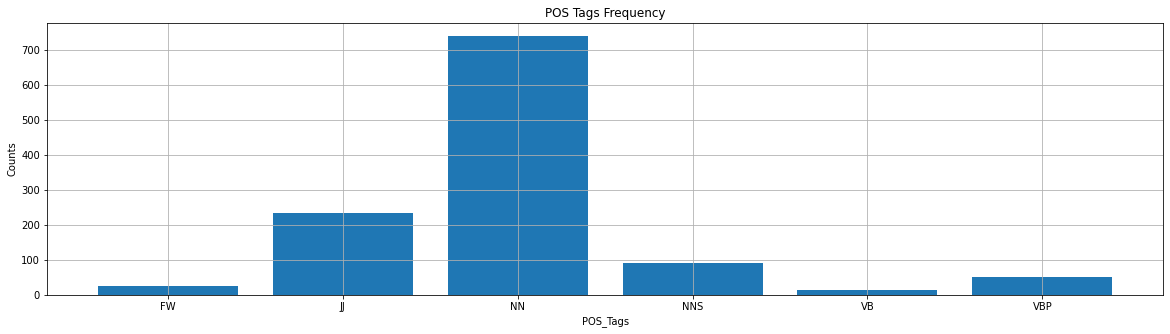

In [106]:
import matplotlib.pylab as plt
data = pos_count.items()
data = sorted(data) 
x, y = zip(*data) 
plt.figure(figsize=(20,5))
plt.title("POS Tags Frequency")
plt.xlabel("POS_Tags")
plt.ylabel("Counts")
plt.bar(x, y)
plt.grid(True)
plt.show()